# Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.api import qqplot
from statsmodels.formula.api import ols #for linear regression
import seaborn as sns #for heatmap
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
from sklearn.metrics import r2_score
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.diagnostic import het_breuschpagan

<h3>We want to predict Price using the variables given in the data</h3>

In [2]:
data=pd.read_csv("Automobile_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 no

In [4]:
data.isnull().values.any()

True

In [5]:
data=data.dropna()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 24 columns):
make                 193 non-null object
fuel_type            193 non-null object
aspiration           193 non-null object
num_of_doors         193 non-null object
body_style           193 non-null object
drive_wheels         193 non-null object
engine_location      193 non-null object
wheel_base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb_weight          193 non-null int64
engine_type          193 non-null object
num_of_cylinders     193 non-null object
engine_size          193 non-null int64
fuel_system          193 non-null object
bore                 193 non-null float64
stroke               193 non-null float64
compression_ratio    193 non-null float64
horsepower           193 non-null float64
peak_rpm             193 non-null float64
city_mpg             193 no

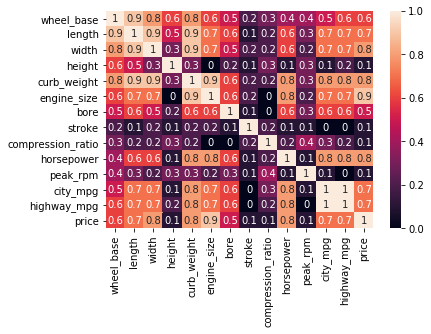

In [7]:
sns.heatmap(data.corr().abs().round(1), annot=True)

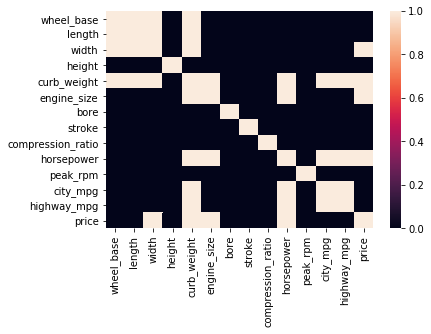

In [8]:
sns.heatmap(data.corr().abs()>=0.75)

In [9]:
#let's remove variables which have corr more than 0.75
del data["wheel_base"]

In [10]:
del data["horsepower"]

In [11]:
del data["curb_weight"]

In [12]:
del data["length"]

In [13]:
del data["city_mpg"]

In [14]:
var=data.columns.tolist()

In [15]:
del var[-1]

In [16]:
formula="+".join(var)
formula="price~"+formula
formula

'price~make+fuel_type+aspiration+num_of_doors+body_style+drive_wheels+engine_location+width+height+engine_type+num_of_cylinders+engine_size+fuel_system+bore+stroke+compression_ratio+peak_rpm+highway_mpg'

In [17]:
results=ols(formula=formula,data=data).fit()

In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     70.62
Date:                Tue, 16 Oct 2018   Prob (F-statistic):           3.82e-79
Time:                        20:38:35   Log-Likelihood:                -1696.1
No. Observations:                 193   AIC:                             3494.
Df Residuals:                     142   BIC:                             3661.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -2.53e+04   1.11e+04     -2.271      0.025   -4.73e+04   -3274.644
make[T.audi]                 705.7845   2352.625      0.300      0.765   -3944.911    5356.480
make[T.bmw]                 4958.6545   2429.747      2.041      0.043     155.503    9761.806
make[T.chevrolet]          -3274.0881   2241.852     -1.460      0.146   -7705.806    1157.630
make[T.dodge]              -3892.8727   1861.560     -2.091      0.038   -7572.826    -212.920
make[T.honda]              -1403.0782   2270.840     -0.618      0.538   -5892.099    3085.943
make[T.isuzu]              -3327.0899   2552.938     -1.303      0.195   -8373.766    1719.586
make[T.jaguar]              3348.9850   2305.609      1.453      0.149   -1208.769    7906.739
make[T.mazda]              -2490.8609   1774.825     -1.403      0.163   -5999.354    1017.632
make[T.mercedes-benz]       4040.7715   2564.919      1.575      0.117   -1029.589    9111.133
make[T.mercury]            -3642.6511   2944.041     -1.237      0.218   -9462.463    2177.161
make[T.mitsubishi]         -4649.4565   1878.000     -2.476      0.014   -8361.907    -937.006
make[T.nissan]             -2959.7540   1754.853     -1.687      0.094   -6428.766     509.258
make[T.peugot]             -3050.3788   1713.440     -1.780      0.077   -6437.527     336.769
make[T.plymouth]           -4251.0601   1852.053     -2.295      0.023   -7912.218    -589.902
make[T.porsche]             3083.1186   2977.053      1.036      0.302   -2801.953    8968.190
make[T.saab]                 466.1473   2042.944      0.228      0.820   -3572.366    4504.661
make[T.subaru]             -4158.8425   1626.064     -2.558      0.012   -7373.263    -944.422
make[T.toyota]             -2882.7879   1610.608     -1.790      0.076   -6066.655     301.079
make[T.volkswagen]         -2558.3878   1859.788     -1.376      0.171   -6234.837    1118.061
make[T.volvo]              -1631.5213   2254.742     -0.724      0.471   -6088.720    2825.677
fuel_type[T.gas]           -2.051e+04   5322.148     -3.854      0.000    -3.1e+04   -9988.336
aspiration[T.turbo]         2321.7491    696.805      3.332      0.001     944.297    3699.201
num_of_doors[T.two]         -536.7291    497.126     -1.080      0.282   -1519.454     445.996
body_style[T.hardtop]      -3054.2189   1154.980     -2.644      0.009   -5337.396    -771.042
body_style[T.hatchback]    -3164.8188   1071.540     -2.954      0.004   -5283.051   -1046.587
body_style[T.sedan]        -2960.5009   1131.937     -2.615      0.010   -5198.126    -722.876
body_style[T.wagon]        -2934.1563   1265.543     -2.318      0.022   -5435.896    -432.416
drive_wheels[T.fwd]        -1230.8213    872.645     -1.410      0.161   -2955.876     494.233
drive_wheels[T.rwd]          -54.7805   120

<h1>Interpreting Results</h1>
<ol>
<li><h3>R-squared:</h3>96.1% of variability of price is explained by the variables included in the model.
<li><h3>F-statistic and Prob (F-statistic):</h3> As Prob(F-statistic) is almost 0, then the overall model is statistically significant.
<li><h3>Adj. R-squared:</h3>We will interpret if we remove or add new variables to the model.
<li><h3>Coefficients</h3> <b>For Continous variable "engine size:</b> 1 unit increase in engine size increases the <b>average</b> price of the car <b>on average</b> by 112.1076 dollars all other factors held constant. <br>
    <b>Dummy variable "aspiration":</b> Before interpreting the coefficients for a dummy variable, firts find what are the categories and which category was chosen as a reference category.<br>
    Aspiration has two categories: std, turbo. Reference category is std. So, the interpretation follows: Cars with turbo type aspiration have <b>on average</b> 2321.75 dollars higher <b>average</b> price compared to the cars with std type aspiration.

# Model Diagnostics

<h1> Cecking for Linearity and Equal variance</h1>

Residuals of the model will be used to test for linearity and for other assumptions as well.

1. Both linearity and equal variance can be tested by plotting residuals vs. predictions (residuals are prediction errors)
2. We will use <b>Rainbow test</b> test for linearity
3. <b>Breusch-Pagan</b> and <b>Jarque-Bera (JB)</b> (JB see from model summary) tests for homoscedasticity


In [19]:
residuals=results.resid
residuals.head()

0   -2089.799888
1     915.200112
2    1174.599777
3     721.392274
4     419.184989
dtype: float64

In [20]:
pred_values=results.predict()

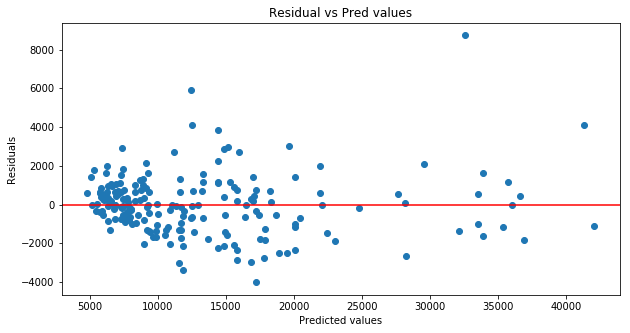

In [21]:
#lets plot predicted values vs residuals
plt.figure(figsize=(10,5))
plt.scatter(pred_values,residuals)
plt.axhline(y=0, c="red")
plt.title("Residual vs Pred values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

<h2>Rainbow test for linearity</h2>
<br>
<b>The Null hypothesis is that the regression is correctly modelled as linear<b>

In [22]:
linear_rainbow(results)

(1.836075624173537, 0.005505146504879589)

2nd value presents p-value
<h3>p-value is less than 0.05, which means that we reject the null hypothesis and the model is NOT linear</h3>

<h2>Breusch-Pagan test for homoscedasticity</h2>

<b>The null hypothesis assumes homoskedasticity</b> <br>
Small p-value shows that there is violation of homoscedasticity

In [23]:
het_breuschpagan(residuals,results.model.exog)

(53.4512660296747, 0.4568108134431555, 1.087803459088037, 0.3444194680844454)

2nd and 4th values are p-values
<h3>P-values are more than 0.05, which means that we failed to reject the null hypothesis, so the data (residuals) are homoskedastic.</h3>

<h1>Normality</h1>

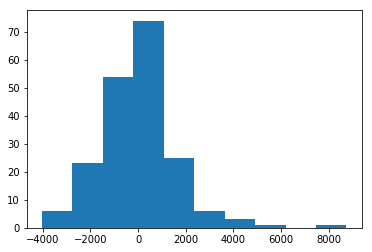

In [24]:
#visual presentation- histogram
plt.hist(residuals)
plt.show()

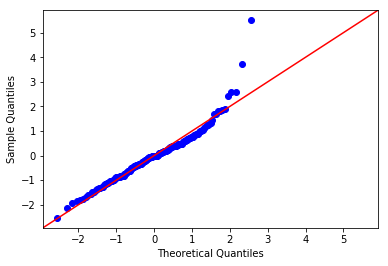

In [25]:
#QQ plot
qqplot(residuals,fit=True, line='45')
plt.show()

<h2>Shapiro-Wilk normality test.</h2> 

The null-hypothesis of this test is that the data was drawn from a normal distribution

In [26]:
stat,p_value = shapiro(residuals)
print(stat,p_value)

0.9368686079978943 1.8917610589141987e-07


<h3>As p-value is less than 0.05 we reject the Null hypothesis which means that we can state with 95% confidence that our data is not normal.</h3>

<h1>Case analysis</h1>
<h2> Problem</h2>
    George R. Martin is the author of the book “A Song of Ice an Fire” famously adopted by the HBO TV series “Game of Thrones”. Tyrion Lannister is one of the main characters in the movie and a well-known fan favorite. Tyrion’s rating over 7 seasons of the series is calculated based on a survey among Game of Thrones fans and is provided in the following table. Based on the decrease in rating for the last season, the movie producer suggests Gerogie “to kill” Tyrion Lannister as “the actor is not doing well enough anymore” in his words.  Provide at least 3 grounded arguments (discussed in detail) why this suggestion might be wrong.

In [27]:
Tyrion=pd.read_csv("Tyrion.csv")
Tyrion

,Season,1,2,3,4,5,6,7
0,Performance rating (out of 10),6.5,7.8,8.2,9.8,10,10,8.2


In [28]:
df_tyr= (Tyrion.set_index('Season').T)
df_tyr

Season,Performance rating (out of 10)
1,6.5
2,7.8
3,8.2
4,9.8
5,10.0
6,10.0
7,8.2


<h1>Let's Think!!!</h1>

<h1>Some Arguments discussed during the session</h1>
1. No information about sample size of fans participated in survey, and whether it was represantative during all seasons
2. No information about the independance of observations
3. We don't know whether the diffrences between seasons was statistically significant or just by chance
4. Why only fans participated to the survey, their opinions may be biased
5. Maybe the overall rating of TV series decreased
6. My be the actor played more in the first seasons and played less during last season
7. No information about types of questions asked and how the calculation of rating was done
8. Mean rating and std. dev can be calculated and see that the decrease is still in the normal range of mean value